In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%%time
loans_data=pd.read_csv("kiva_ds_csv/loans.csv")

Wall time: 9min 10s


In [4]:
loans_data.columns = [x.lower() for x in loans_data.columns]

In [5]:
# loans_data[['POSTED_TIME','PLANNED_EXPIRATION_TIME','DISBURSE_TIME','RAISED_TIME']] = pd.to_datetime(loans_data[['POSTED_TIME','PLANNED_EXPIRATION_TIME','DISBURSE_TIME','RAISED_TIME']],infer_datetime_format=True)
loans_data[['posted_time','planned_expiration_time','disburse_time','raised_time']] = loans_data[['posted_time','planned_expiration_time','disburse_time','raised_time']].apply(pd.to_datetime)

In [6]:
%%time
loans_data['posted_time'].dt.year.value_counts(sort=True)

Wall time: 796 ms


2018    229633
2017    225476
2019    219005
2016    197236
2015    181835
2020    176490
2014    174232
2021    142279
2013    140035
2012    133847
2011    113009
2010     92902
2009     81629
2008     50697
2007     26314
2006      3200
Name: posted_time, dtype: int64

In [7]:
nrow, ncol = loans_data.shape
nrow, ncol

(2187819, 34)

In [8]:
#EDA for Categorical Variables
ds_cat = loans_data.select_dtypes(include = 'object').copy()
ds_cat.head()

,loan_name,original_language,description,description_translated,status,activity_name,sector_name,loan_use,country_code,country_name,town_name,currency_policy,currency,tags,borrower_names,borrower_genders,borrower_pictured,repayment_interval,distribution_model
0,Emelisa,English,Emelisa is 32 years old. With two children in...,Emelisa is 32 years old. With two children in...,funded,General Store,Retail,"to buy items to sell like beverages, canned go...",PH,Philippines,"Calbayog City 2, Samar",shared,PHP,#Woman-Owned Business,Emelisa,female,true,monthly,field_partner
1,Samol,English,Samol is married and she lives with her husban...,Samol is married and she lives with her husban...,funded,Personal Housing Expenses,Housing,to purchase construction material.,KH,Cambodia,Prek Pnov District,standard,USD,"#Repair Renew Replace, #Parent",Samol,female,true,monthly,field_partner
2,ABLA,French,Abla est une femme célibataire qui habite à Ag...,Abla is an unmarried woman living in Agoe. She...,funded,Food Production/Sales,Food,"to buy 5 sacks of corn, 2 cans of oil, and a s...",TG,Togo,Agoe,shared,XOF,"#Woman-Owned Business, user_favorite",ABLA,female,true,monthly,field_partner
3,Emanuellita,English,Emanuellita works hard to support six children...,Emanuellita works hard to support six children...,funded,Personal Housing Expenses,Housing,to build a sanitary toilet,PH,Philippines,"Cordova, Cebu",shared,PHP,"#Health and Sanitation, #Eco-friendly",Emanuellita,female,true,monthly,field_partner
4,Leizel,English,Leizel is 26 years old and married with one ch...,NaN,funded,Livestock,Agriculture,to buy livestock to raise,PH,Philippines,"Kabankalan, Negros Occidental",shared,PHP,NaN,Leizel,female,true,monthly,field_partner


In [9]:
ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in ds_cat.columns:
    tmp['column'] = [c]
    tmp['values'] = [ds_cat[c].unique()]
    tmp['values_count_incna'] = len(list(ds_cat[c].unique()))
    tmp['values_count_nona'] = int(ds_cat[c].nunique())
    tmp['num_miss'] = ds_cat[c].isnull().sum()
    tmp['pct_miss'] = (ds_cat[c].isnull().sum()/ len(ds_cat)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,loan_name,"[Emelisa, Samol, ABLA, Emanuellita, Leizel, na...",477941,477940,50390,2.3
0,original_language,"[English, French, nan, Spanish, Russian, Portu...",9,8,46041,2.1
0,description,[Emelisa is 32 years old. With two children i...,2137257,2137256,46270,2.1
0,description_translated,[Emelisa is 32 years old. With two children i...,1728027,1728026,455656,20.8
0,status,"[funded, expired, refunded, fundRaising]",4,4,0,0.0
0,activity_name,"[General Store, Personal Housing Expenses, Foo...",163,163,0,0.0
0,sector_name,"[Retail, Housing, Food, Agriculture, Services,...",15,15,0,0.0
0,loan_use,"[to buy items to sell like beverages, canned g...",1284418,1284417,46064,2.1
0,country_code,"[PH, KH, TG, KE, PS, PK, TO, LB, CL, AM, MG, K...",99,98,36,0.0
0,country_name,"[Philippines, Cambodia, Togo, Kenya, Palestine...",99,99,0,0.0


In [97]:
#drop columns that will not be used for modeling
loans=loans_data.drop([
    'description',
    'description_translated',
    'country_code','town_name',
    'currency_exchange_coverage_rate',
    'planned_expiration_time',
    
    'borrower_names',
    'loan_name',
    'image_id',
    'video_id',
    #'num_journal_entries',# find the meaning before dropping, use boxplot
    #'num_bulk_entries',#boxplot
    'tags',
    'raised_time',
    'disburse_time',
    'activity_name',
    'loan_use'],
    axis=1)

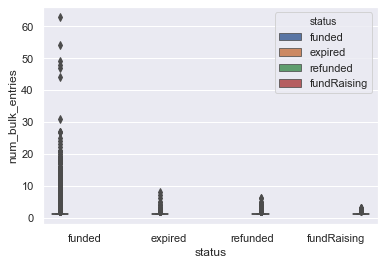

In [99]:
sns.boxplot (y='num_bulk_entries',x='status',hue='status',data=loans)

In [100]:
#rename columns
loans.rename(columns={"borrower_genders": "gender"},inplace=True)
loans.dropna(subset = ['gender'],inplace=True)

In [101]:
loans['group_gender'] = loans['gender'].map({'male':'male','female':'female'}).fillna('group')

In [102]:
loans['group_gender'].value_counts()

female    1417379
male       436449
group      287950
Name: group_gender, dtype: int64

In [103]:
#remove empty spaces and change gender column into a list
loans['gender'] = loans.gender.apply(lambda x: x.replace(' ',''))
loans['gender_list'] = loans.gender.apply(lambda x: x.split(','))

In [104]:
'''
for loans submitted by a group of people we counted the gender proportion
'the gender' of the group was assigned according to the gender of the majority
'''
from collections import Counter
loans['gender_counts'] = loans.gender_list.apply(lambda x: Counter(x))
loans['dominant_gender'] = loans.gender_counts.apply(lambda x: x.most_common(1)[0][0])
#c = Counter(loans.gender_list[1053])
#c

In [105]:
loans.dominant_gender.value_counts()

female         1669584
male            472140
unspecified         54
Name: dominant_gender, dtype: int64

In [106]:
#drop rows where gender is unspecified
loans=loans.loc[loans['dominant_gender']!='unspecified']

In [107]:
loans.dominant_gender.value_counts()

female    1669584
male       472140
Name: dominant_gender, dtype: int64

Text(3.1999999999999886, 0.5, '')

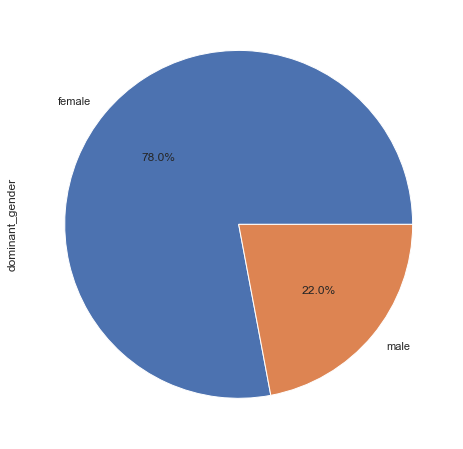

In [108]:
fig = plt.figure(figsize = (8,8))
#fig.patch.set_facecolor('lightgrey')
#sns.set(font_scale =1)
#ax1 = fig.add_subplot(2,2,1)
loans['dominant_gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
#ax1.set_xlabel("Proportion of users per Creation Source")
ax1.set_ylabel(None)


#sns.countplot(data = adoption_df, x='creation_source',hue='adopted',ax=ax3)
#adoption_df['email_domain'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=(0.05, 0.05, 0.05, 0.05,0.05,0.05),shadow=True,ax=ax3,style='tableau-colorblind10')

#plt.savefig('adoption.jpeg',dpi=300)

In [109]:
#missing values
missing_df = pd.DataFrame(columns = ['column','num_miss', 'pct_miss'])
tmp2 = pd.DataFrame()

for c in loans.columns:
    tmp2['column'] = [c]
    tmp2['num_miss'] = loans[c].isnull().sum()
    tmp2['pct_miss'] = (loans[c].isnull().sum()/ len(loans)).round(3)*100
    missing_df = missing_df.append(tmp2)
missing_df

,column,num_miss,pct_miss
0,loan_id,0,0.0
0,original_language,0,0.0
0,funded_amount,0,0.0
0,loan_amount,0,0.0
0,status,0,0.0
0,sector_name,0,0.0
0,country_name,0,0.0
0,currency_policy,0,0.0
0,currency,0,0.0
0,partner_id,0,0.0


In [119]:
#loans['group_gender'] = loans['gender'].map({'male':'male','female':'female'}).fillna('group')
loans.lender_term.describe()


count    2.141700e+06
mean     1.307440e+01
std      7.185531e+00
min      1.000000e+00
25%      8.000000e+00
50%      1.300000e+01
75%      1.400000e+01
max      1.560000e+02
Name: lender_term, dtype: float64